# Table of Contents
 <p><div class="lev1"><a href="#Lea-package-first-studies"><span class="toc-item-num">1&nbsp;&nbsp;</span>Lea package first studies</a></div><div class="lev2"><a href="#Flip-coin"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Flip coin</a></div><div class="lev2"><a href="#&quot;Rain-Sprinkler-Grass&quot;-bayesian-network"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>"Rain-Sprinkler-Grass" bayesian network</a></div><div class="lev2"><a href="#Happiness-Test"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Happiness Test</a></div><div class="lev2"><a href="#Alarm-test"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Alarm test</a></div><div class="lev2"><a href="#Test-#1"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Test #1</a></div><div class="lev2"><a href="#References"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>References</a></div>

# Lea package first studies

In [1]:
from IPython.display import display, HTML
from nxpd import draw

import networkx as nx

In [2]:
def draw_graph(
    graph, labels=None
):
    # create networkx graph
    G = nx.DiGraph()
    G.graph['dpi'] = 120

    G.add_nodes_from(set([
        graph[k1][k2] 
        for k1 in range(len(graph)) 
        for k2 in range(len(graph[k1]))
    ]))
    G.add_edges_from(graph)
    return draw(G, show='ipynb')

## Flip coin

In [3]:
from lea import *

In [4]:
flip1 = Lea.fromValFreqs(('head',67),('tail',33))
flip1

head : 67/100
tail : 33/100

In [5]:
P(flip1=='head')

67/100

In [6]:
Pf(flip1=='head')

0.67

In [7]:
flip1.random(10)

('tail',
 'head',
 'head',
 'tail',
 'tail',
 'head',
 'head',
 'head',
 'head',
 'head')

In [8]:
flip2 = flip1.clone()
flips = flip1 + '-' + flip2
flips

head-head : 4489/10000
head-tail : 2211/10000
tail-head : 2211/10000
tail-tail : 1089/10000

In [9]:
P(flip1==flip2)

2789/5000

In [10]:
P(flip1!=flip2)

2211/5000

In [11]:
flip1.upper()
flip1.upper()[0]

H : 67/100
T : 33/100

In [12]:
def toInt(flip):
    return 1 if flip=='head' else 0

headCount1 = flip1.map(toInt)
headCount1

0 : 33/100
1 : 67/100

In [13]:
headCount2 = flip2.map(toInt)
headCounts = headCount1 + headCount2
headCounts 

0 : 1089/10000
1 : 4422/10000
2 : 4489/10000

In [14]:
headCounts.given(flip1==flip2)
headCounts.given(flip1!=flip2)
flip1.given(headCounts==0)
flip1.given(headCounts==1)

flip1.given(headCounts==2)

head : 1

## "Rain-Sprinkler-Grass" bayesian network

Suppose that there are two events which could cause grass to be wet: either the sprinkler is on or it's raining. Also, suppose that the rain has a direct effect on the use of the sprinkler (namely that when it rains, the sprinkler is usually not turned on). Then the situation can be modeled with a Bayesian network (shown to the right). All three variables have two possible values, T (for true) and F (for false).

The joint probability function is:

$P (G,S,R)= P (G| S,R) P(S| R) P(R)$

where the names of the variables have been abbreviated to G = Grass wet (yes/no), S = Sprinkler turned on (yes/no), and R = Raining (yes/no).

![SimpleBayesNet](https://upload.wikimedia.org/wikipedia/commons/0/0e/SimpleBayesNet.svg)

The model can answer questions like "What is the probability that it is raining, given the grass is wet?" by using the conditional probability formula and summing over all nuisance variables:



In [15]:
rain = B(20,100)
sprinkler = Lea.if_(rain, B(1,100), B(40,100))
grassWet = Lea.buildCPT(
    ( ~sprinkler & ~rain, False               ),
    ( ~sprinkler &  rain, B(80,100)),
    (  sprinkler & ~rain, B(90,100)),
    (  sprinkler &  rain, B(99,100))
)

grassWet

False : 27581/50000
 True : 22419/50000

## Happiness Test

$P('S', 0.7)$

$P('R', 0.01)$

In [16]:
Sunny = B(70,100)
Raise = B(1,100)

print(Sunny)
print(Raise)

False : 3/10
 True : 7/10
False : 99/100
 True :  1/100


In [17]:
# independence check
assert Sunny.given(Raise).p(True) == Sunny.p(True)

$P(of='H', given=['S', 'R'], value=1)$

$P(of='H', given=['!S', 'R'], value=0.9)$

$P(of='H', given=['S', '!R'], value=0.7)$

$P(of='H', given=['!S', '!R'], value=0.1)$

In [18]:
Happy = Lea.buildCPT(
    (Sunny & Raise, B(100,100)),
    (~Sunny & Raise, B(90,100)),
    (Sunny & ~Raise, B(70,100)),
    (~Sunny & ~Raise, B(10,100))
)
Happy

False :  951/2000
 True : 1049/2000

In [19]:
# Evidences
# P(H|S)=0.703
# P(H|R)=0.97
# P(H)=P(H|S)P(S)+P(H|¬S)P(¬S)=…≈0.5245 

assert Happy.given(Sunny).pmf(True) == 0.703
assert Happy.given(Raise).pmf(True) == 0.97
assert Happy.pmf(True) == 0.5245

In [20]:
Raise.given(Happy & Sunny).pmf(True)

0.01422475106685633

In [21]:
Raise.given(Happy).pmf(True)

0.018493803622497616

In [22]:
Raise.given(Happy & ~Sunny).pmf(True)

0.08333333333333333

## Alarm test

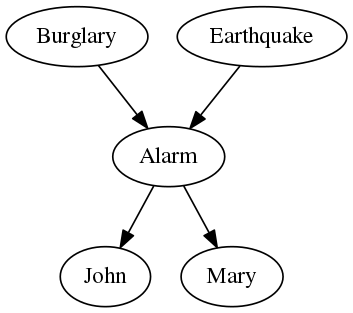

In [23]:
graph = [
    ('Burglary', 'Alarm'), 
    ('Earthquake', 'Alarm'), 
    ('Alarm', 'John'), 
    ('Alarm', 'Mary')
]
draw_graph(graph)

In [24]:
Burglary = B(1,1000)
Earthquake = B(2,1000)

Alarm = Lea.buildCPT(
    (Burglary & Earthquake, B(95,100)),
    (Burglary & ~Earthquake, B(94,100)),
    (~Burglary & Earthquake, B(29,100)),
    (~Burglary & ~Earthquake, B(1,1000)),
    
)

John = Lea.if_(Alarm, B(90,100), B(5,100))
Mary = Lea.if_(Alarm, B(70,100), B(1,100))

In [25]:
# P(+b) P(e) P(a|+b,e) P(+j|a) P(+m|a)
print('P(+b):', Burglary.pmf(True))
print('P(e):', Earthquake.pmf(True))
print('P(a|+b,e):', Alarm.given(Burglary & Earthquake).pmf(True))
print('P(+j|a):', John.given(Alarm).pmf(True))
print('P(+m|a):', Mary.given(Alarm).pmf(True))
print('=', 0.001 * 0.002 * 0.95 * 0.9 * 0.7)

P(+b): 0.001
P(e): 0.002
P(a|+b,e): 0.95
P(+j|a): 0.9
P(+m|a): 0.7
= 1.197e-06


## Test #1

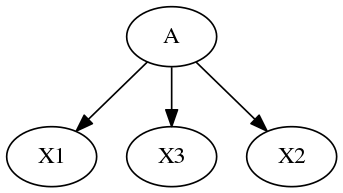

In [26]:
graph = [
    ('A', 'X1'), 
    ('A', 'X2'), 
    ('A', 'X3'), 
]
draw_graph(graph)

In [28]:
A = Lea.boolProb(1,2)

# using variable elimination
# X1_A = Lea.if_(A, (2,10), (6,10))
# X2_A = Lea.if_(A, (2,10), (6,10))
# X3_A = Lea.if_(A, (2,10), (6,10))

X1 = B(4, 10)
X2 = B(4, 10)
X3 = B(4, 10)

A.given(X1 & X2 & ~X3).pmf(True)

0.5

## References

https://bitbucket.org/piedenis/lea

https://en.wikipedia.org/wiki/Bayesian_network